# MNIST Dataset [SGD]

In [1]:
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

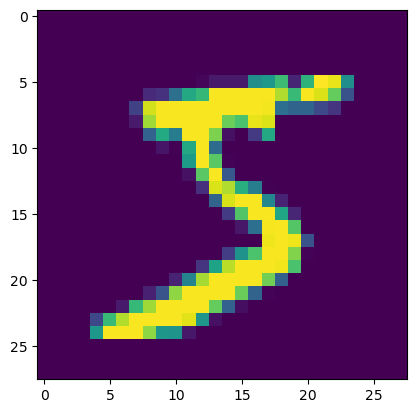

In [5]:
sampleA = X.loc[0].to_numpy()
sA = sampleA.reshape(28, 28)

plt.imshow(sA)

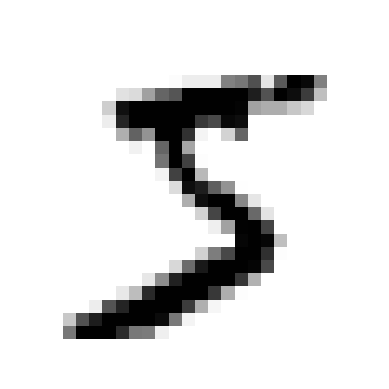

In [6]:
plt.imshow(sA, cmap = "binary")
plt.axis("off")
plt.show()

In [7]:
y[0]

'5'

In [8]:
y = y.astype(np.uint8)
y[0]

5

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [11]:
# sdg classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [12]:
valutation = cross_val_score(sgd_clf, X_test, y_test, cv = 3, scoring = "accuracy")
valutation

array([0.82783443, 0.85448545, 0.8919892 ])

<AxesSubplot:>

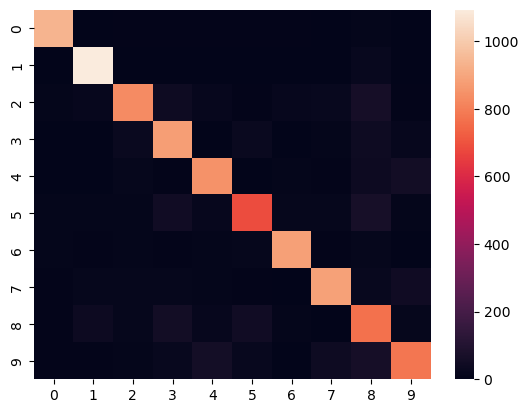

In [13]:
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test, cv = 3)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm)